In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

In [2]:
%matplotlib notebook

# Salience in Matplotlib: Considering the Defaults For Basic Plotting

**Version 0.1**

***
By AA Miller 
5 Jan 2021

As discussed in today's lecture, and previous lectures, there is no limit on the number of choices you have when developing visual communications. This ranges from the relatively mundane – should the plot axis be 1 mm or 1.3 mm thick? – to the subtle and vitally complex – should the isolated 7-$\sigma$ outlier be highlighted or just referenced in a caption? 

All of these choices (yes, even something as mundane as the width of the axis) affect the salience of the visualization.

To better understand how to build salience *in `matplotlib`* today's problems will first focus on the default settings. After examining the defaults, and identifying situations when they simply will not do, we will apply what we have learned to improve the salience of *an existing* image. 

**Important disclaimer** Many DSFP notebooks are designed with a goal to *do the thing*. While this notebook also has a *do the thing* component (namely to examine plotting choices in `matplotlib`), it is more essential to *consider the output*. Rather than rushing to "level up" each problem, consider the visual output *and how it affects what you are communicating to your audience*.

## Problem 1) Matplotlib Defaults & A Basic Plot

The single most influential factor in the final appearance of the visualizations that you create is the default settings for your preferred plotting software,$^\dagger$ whether you typically use `matplotlib` or something else. 

Therefore it is important to understand the defaults, and how they are secretly (or not so secretly) affecting your output.

$^\dagger$ There are some exceptions like [D3.js](https://d3js.org/) where literally every element of the visualization has to be specified by the user.

The default settings in `matplotlib` [changed dramatically between versions 1.0 and 2.0](https://matplotlib.org/users/dflt_style_changes.html). These changes were all for the better, but, as the docs say "it is impossible to select the best default for all cases."

**Problem 1a**

Create a "toy" data set using the [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) function from [`scikit-learn`](https://scikit-learn.org/stable/index.html) to generate 3 different classes in a 4 dimensional data space.

*Hint – execute the cell below*

In [3]:
np.random.seed(2003)
X, y = make_classification(n_samples=367, n_classes=3, 
                           n_features=4, n_redundant=0, n_informative=4,
                           flip_y=0.0, weights=[0.575,0.42, 0.005])

Let's unpack what we just did: we created a data set with `n_samples=367` sources, separated across `n_classes=3` different classes, in a `n_features=4` dimensional space. The classes are not balanced, execute the cell below to show that class 2 is quite rare.

In [4]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([211, 155,   1]))

Recall that `scikit-learn` feature arrays (typically labeled `X`) are 2D `numpy` arrays where each row corresponds to an individual source and each column corresponds to a different feature. We will mostly focus on features (i.e., columns) 1 and 2 and classes 0 and 1 today (the other class will become important in the end). 

**Problem 1b) A scatter plot function**

Create a function `basic_scatter()` that takes as arguments a maplotlib axis instance `ax`, a scikit-learn data array `X`, and optional `**kwargs`. The function should add a scatter plot to the axis instance using the first two features in `X`, and then return `ax`. Note that this construction is a little silly, but it will allow us to easily loop and examine several different options in subsequent problems.

*Hint - use the [`plt.plot()`](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) call to create the scatter plot. This will require "turning off" the lines `ls = 'None'`, and specifying a marker `m = 'o'`. We will start with a circle but examine this choice later.*

In [53]:
def basic_scatter(ax, X, m= 'o',plotconfig={}): # complete
    """Add simple scatter plot to axis object
    
    Parameters
    ----------
    ax : matplotlib.pyplot axis instance
        The axis object that will have/display the scatter plot
    
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The input samples.
    
    m : matplotlib marker, optional (default = 'o')
        A matplotlib marker, see: 
        https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_marker 
    
    Returns
    -------
    
    ax : matplotlib.pyplot axis instance
        The axis object with an associated scatter plot
    """
    dicts={'title':'scatter plot', 'xlabel': 'X', 'ylabel': 'Y',
                                       'marker':None,'fontsize':14}
    dicts.update(plotconfig)    
    ax.plot(X[:,0],X[:,1],m,ls='None',mfc=dicts['marker'],color= dicts['color'])# complete
    ax.set_xlabel(dicts['xlabel'],fontsize=dicts['fontsize'])# complete
    ax.set_ylabel(dicts['ylabel'],fontsize=dicts['fontsize'])# complete
    ax.set_title(dicts['title'],fontsize=dicts['fontsize'])# complete
    return ax

**Problem 1c) A histogram function**

Create a function `basic_histogram()` that takes as arguments a maplotlib axis instance `ax`, a scikit-learn data array `X`, and optional `**kwargs`. The function should add a histogram to the axis instance using the first feature in `X`, and then return `ax`. Again, this is silly, but it will be useful later.

In [6]:
def basic_histogram(ax, X, bins='auto', 
                    histdict={}): # complete
    """Add simple histogram to axis object
    
    ### Write your own docstrings ###
    Parameters
    ----------
    ax : matplotlib.pyplot axis instance
        The axis object that will have/display the scatter plot
    
    X : {array-like} of shape (n_samples, 1)
        The input samples.
    bins :  int, string, or array-like object 
    hist_config : dictionary with histogram configurations
        
    Returns
    -------
    
    ax : matplotlib.pyplot axis instance
        The axis object with an associated scatter plot
    """
    hist_config={'histtype':'step', 'lw':2, 
                                 'title':'scatter plot', 'xlabel': 'X', 'ylabel': 'N','fontsize':14}
    hist_config.update(histdict)
    ax.hist(X,bins=bins, histtype= hist_config['histtype'],lw= hist_config['lw'])# complete
    ax.set_xlim([X.min()-1,X.max()+1])
    ax.set_xlabel(hist_config['xlabel'],fontsize=hist_config['fontsize'])# complete
    ax.set_ylabel(hist_config['ylabel'],fontsize=hist_config['fontsize'])# complete
    ax.set_title(hist_config['title'],fontsize=hist_config['fontsize'])# complete
    return ax

**Problem 1d) The basic figure**

Execute the cell below to create a side-by-side visualization showing a scatter plot of the first two features in the `X` array ($\mathtt{X1}$ vs. $\mathtt{X0}$) in the left panel, and a histrogram of the first feature $\mathtt{X0}$ in the right panel.

*Hint - if there are only a few data points, you have indexed the `X` array incorrectly. If you do not have a scatter plot, you have either not specified a marker style and/or set `ls = 'None'` in the call to `basic_scatter`.*

<IPython.core.display.Javascript object>


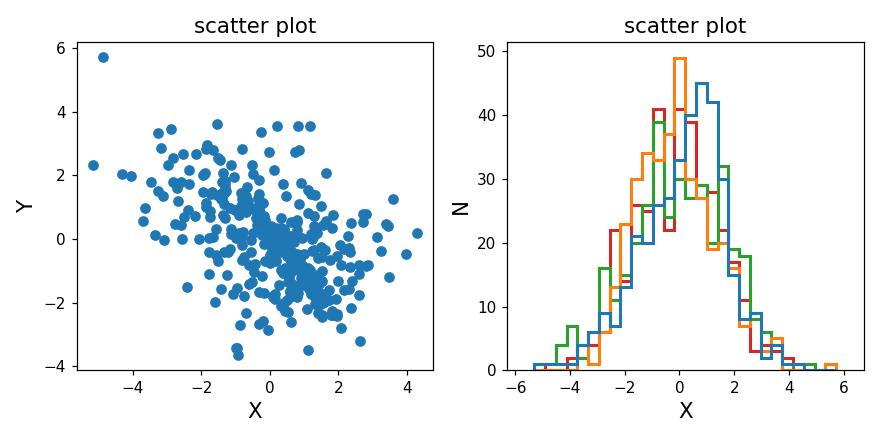

In [20]:
fig, axes = plt.subplots(1, 2, sharex=False,
                         figsize=(8,4))
basic_scatter(axes[0], X)
basic_histogram(axes[1], X)
fig.tight_layout()

This now constitutes our "basic plot" using the `matplotlib` defaults. (Technically we have specified a marker symbol, though note - this symbol is the default for [`plt.scatter`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html).)

Now we will change the `matplotlib` parameters and examine simple ways to more effectively communicate (hopefully it is now clear why "silly" functions were constructed for this problem).

## Problem 2) Symbols

The above figure is not satisfying. The large number of overlapping points near the center of the scatter plot obscures the true density of the data.

**Problem 2a**

Remake the scatter plot from above using the `matplotlib` point symbol (`m='.'`), which is also a circle, but by default smaller than the `'o'` marker symbol.

*Hint - for the remainder of this problem you can ignore the histogram.*

<IPython.core.display.Javascript object>


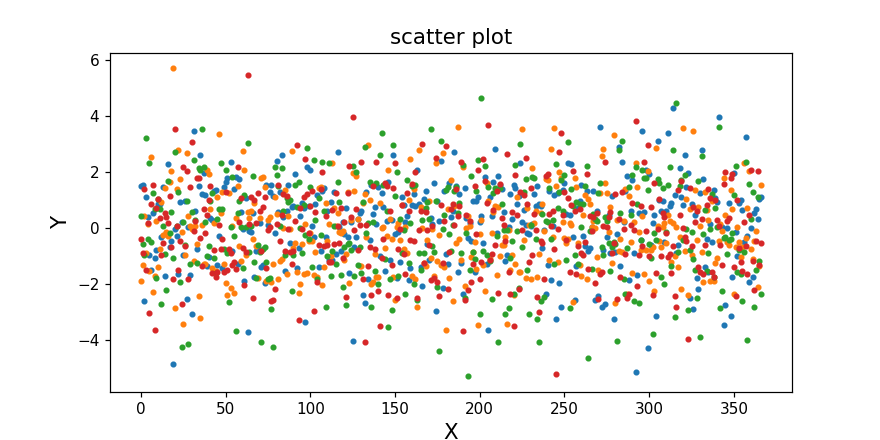

<AxesSubplot:title={'center':'scatter plot'}, xlabel='X', ylabel='Y'>

In [8]:
fig, axes = plt.subplots(1, sharex=True,
                         figsize=(8,4))
basic_scatter(axes, X,m='.')# complete

That is better but the problem persists. We can of course always go smaller...

**Problem 2b**

Remake the scatter plot using the `matplotlib` pixel symbol (`m=','`).

<IPython.core.display.Javascript object>


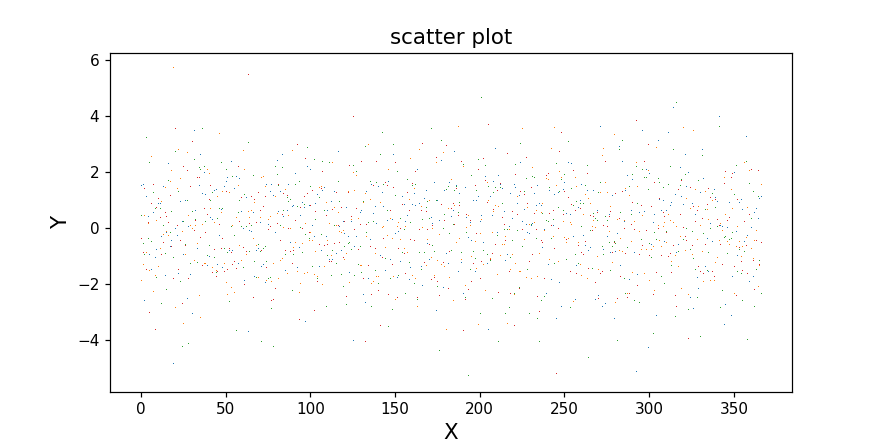

<AxesSubplot:title={'center':'scatter plot'}, xlabel='X', ylabel='Y'>

In [9]:
fig, axes = plt.subplots(1, sharex=True,
                         figsize=(8,4))
basic_scatter(axes, X, m=',')# complete

The points no longer overlap, but they are also nearly illegible. 

**Problem 2c**

Make a grid of 5 side-by-side plots showing the following common symbols: circle `'o'`, square `'s'`, triangle `'^'`, plus sign `'+'`, and hexagon `'h'`. 

<IPython.core.display.Javascript object>


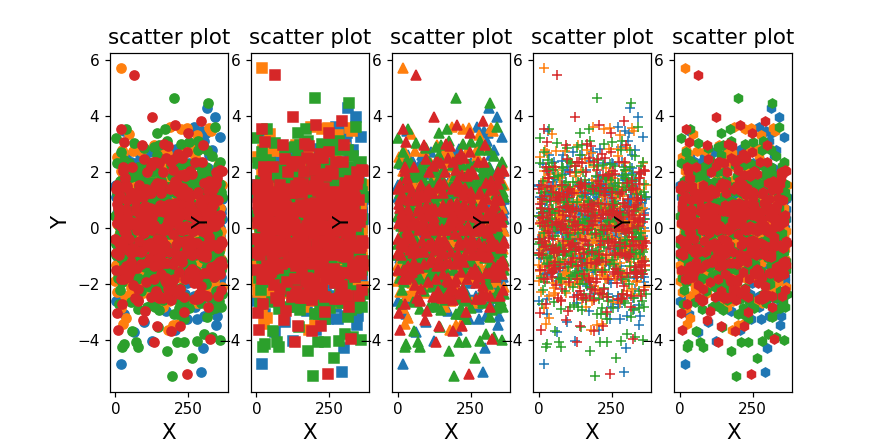

In [10]:
fig, axes =  plt.subplots(1, 5, sharex=True,
                         figsize=(8,4))
for ax,m in zip(axes,['o','s','^','+','h']):
    basic_scatter(ax, X,m=m) # complete
# complete
# complete
# Complete

**Problem 2d**

Repeat the same grid using open symbols (i.e., only the outline of the symbol should be displayed). 

<IPython.core.display.Javascript object>


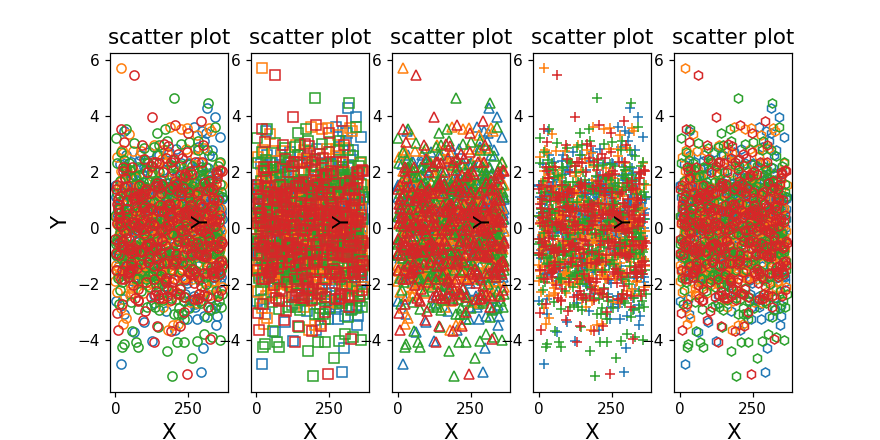

In [11]:
fig, axes =  plt.subplots(1, 5, sharex=True,
                         figsize=(8,4))
for ax,m in zip(axes,['o','s','^','+','h']):
    basic_scatter(ax, X,m=m,plotconfig={'marker':'None'} )
    # complete

If the grid of plots is very small on your screen – be sure to consider each panel in detail (either zoom in, or remake the plot at a larger size, etc). 

What do you notice?

*Write your response here*



The open circle is **the most flexible symbol**. Overlapping circles do not create new circles thereby providing a more unique sense of the underlying density.

(Quick aside - as N grows very large, plotting the individual points is not informative. Consider alternatives, e.g., contours, 2d histogram, etc.)

## Problem 3) Strong Visual Boundaries

We have, until now, ignored the different classes in our data set. We will now consider visualizations that feature $> 1$ symbol.

**Problem 3a**

Start with the `matplotlib` defaults and remake the "basic plot" from **1d** with different symbols for class 0 and class 1 (ignore class 2 for now).

<IPython.core.display.Javascript object>


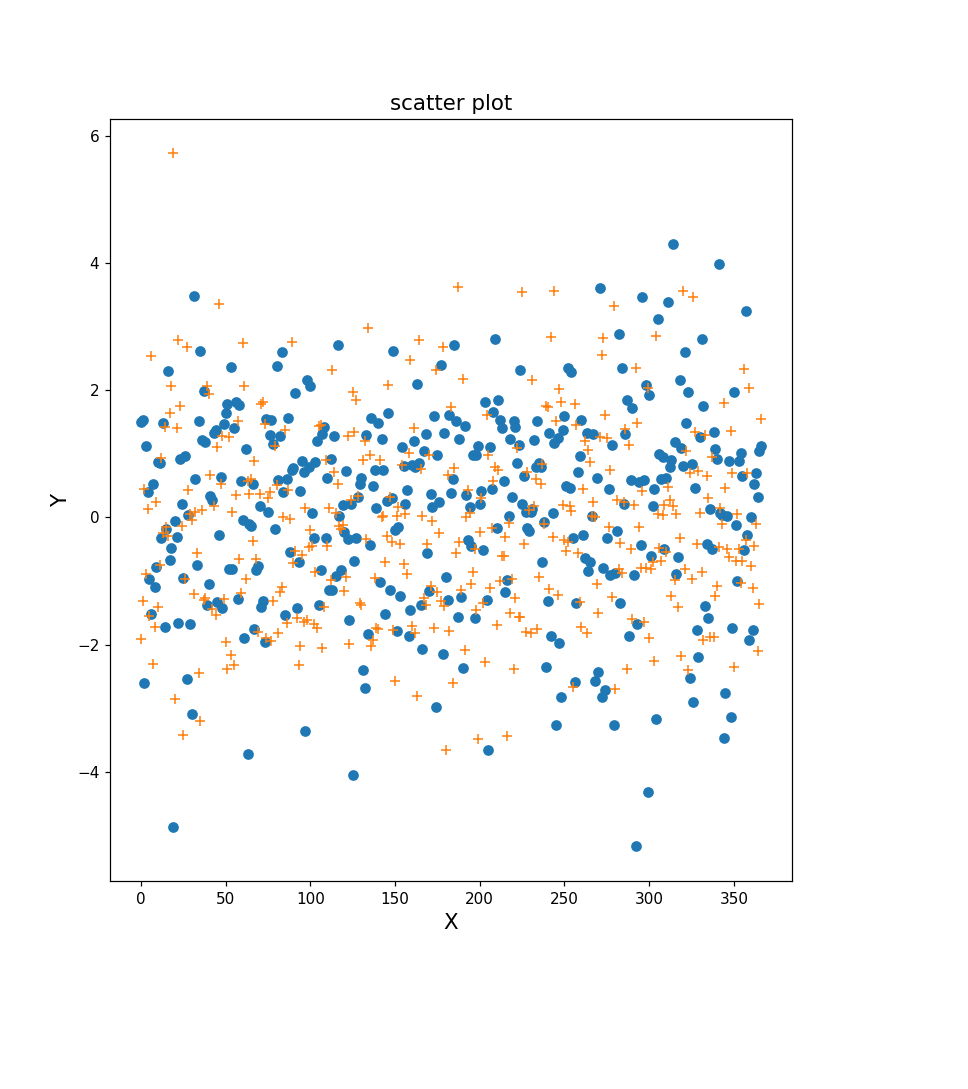

<AxesSubplot:title={'center':'scatter plot'}, xlabel='X', ylabel='Y'>

In [12]:
class0 = 'o' # complete
class1 = '+' # complete

fig, axes = plt.subplots(1,figsize=(8,9)) # complete
basic_scatter(axes,X[:,0],m=class0)# complete
basic_scatter(axes,X[:,1],m=class1)
# complete
# complete
# complete

The above plot shows that class 0 and 1 have overlapping distributions, though class 0 tends to have larger (smaller) values of $\mathtt{X0}$ ($\mathtt{X1}$) than class 1.

We also see that the filled circle performs worse as the number of classes increases, while filled histograms obscure the data in regions that exhibit significant overlap. 

While minor changes to the above code can rectify these changes, recall that we are showing the defaults for `matplotlib`.

**Problem 3b**

Following **2d** re-make the plot from **3a** using open circles and open histograms. 

*Hint - use the kwarg `histtype='step'` in the call to `basic_histogram()`*

<IPython.core.display.Javascript object>


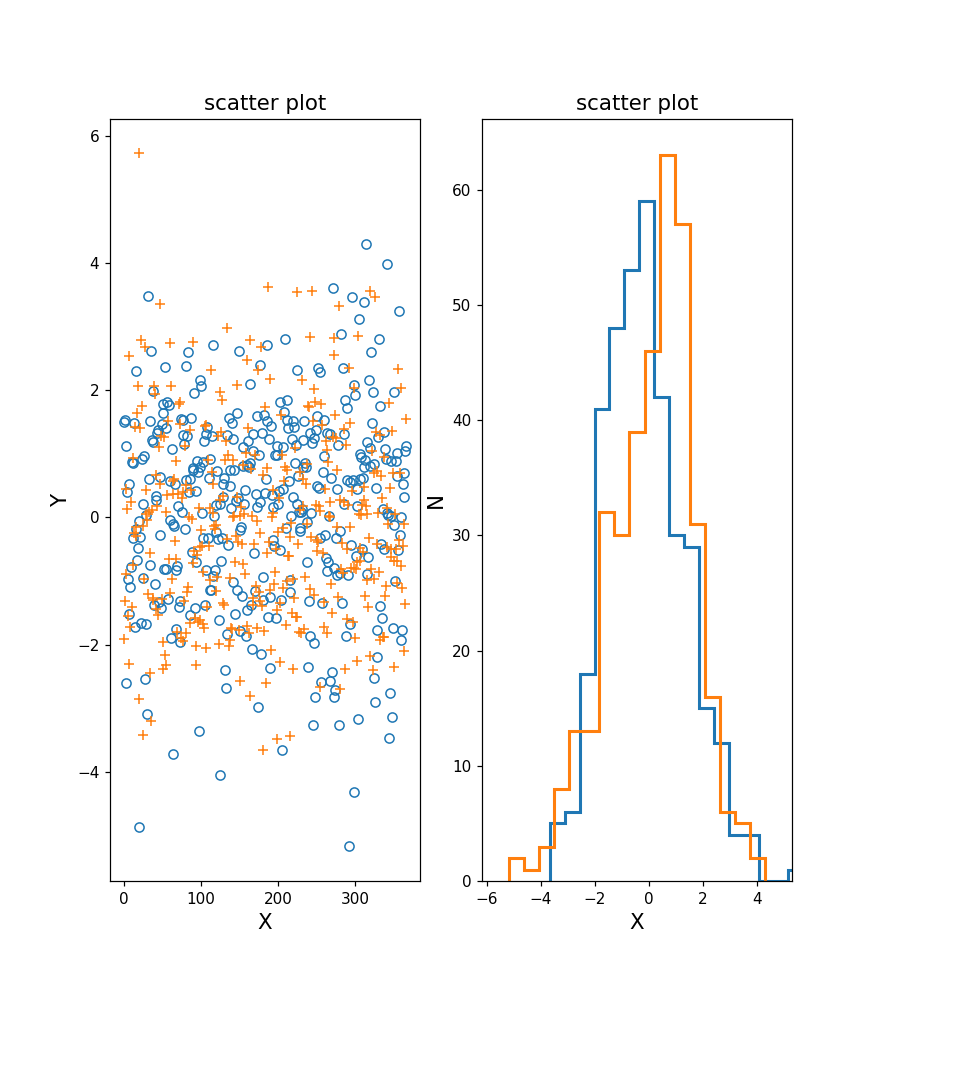

<AxesSubplot:title={'center':'scatter plot'}, xlabel='X', ylabel='N'>

In [13]:
fig, axes = plt.subplots(1,2,figsize=(8,9)) # complete
basic_scatter(axes[0],X[:,0],m=class0, plotconfig={'marker':'None'})# complete
basic_scatter(axes[0],X[:,1],m=class1,plotconfig={'marker':'None'})
basic_histogram(axes[1], X[:,1])# complete
basic_histogram(axes[1], X[:,0])# complete

This represents an improvement, as we now get a better sense of the data density in regions of overlap.

Nevertheless, this representation lacks strong visual boundaries. Only color separates the classes, and, color does not efficiently transmit information. 

As a rule of thumb it is a good idea to first – build strong visual boundaries, and then – add color (if it is necessary). 

**Problem 3c**

Plot class 0 as an open circle and filled histogram, and plot class 1 as a cross and open histrogram. 

*Hint - if you are using a for loop the python `zip()` function may come in handy.*

<IPython.core.display.Javascript object>


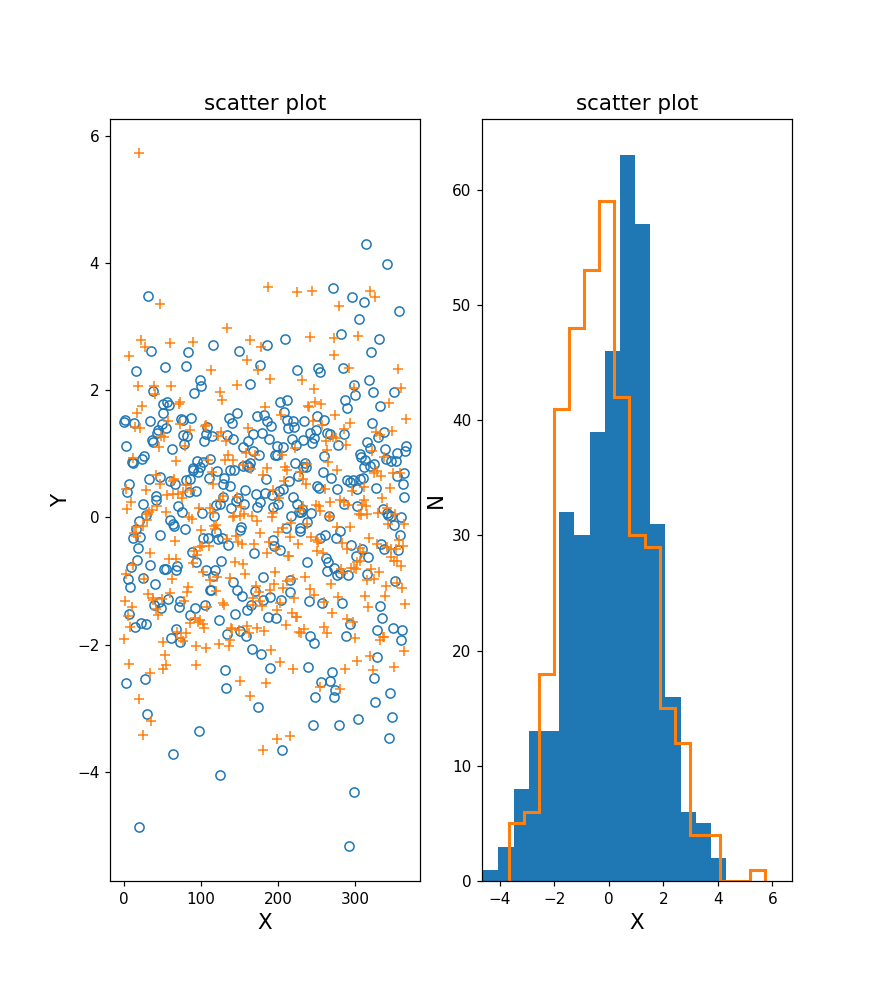

In [14]:
fig, axes = plt.subplots(1,2,figsize=(8,9))
for i, (m,htype) in enumerate(zip(['o','+'],['bar','step'])):
                        basic_scatter(axes[0],X[:,i],m=m,plotconfig={'marker':'None'})
                        basic_histogram(axes[1], X[:,i],histdict={'histtype':htype}) # complete
# complete
# complete

The visual boundaries between the two classes are now much stronger. While we still use color, we do not rely on color  to tell the difference between the classes.

**Problem 3d** 

Make additional changes to the `kwargs` to build even stronger visual boundaries between the two classes.

In [ ]:
# complete
# complete
# complete

Strong visual boundaries are essential for *efficient* communication.

**Problem 3e**

Execute the cell below to see 5 different scatter plots, where only the symbol is being varied. 

Which combinations lead to strong visual boundaries? Which do not? (You may need to zoom to answer these questions)

*Note - I have reduced the size of each class by a factor of 4 to reduce the crowding in these plots*

<IPython.core.display.Javascript object>


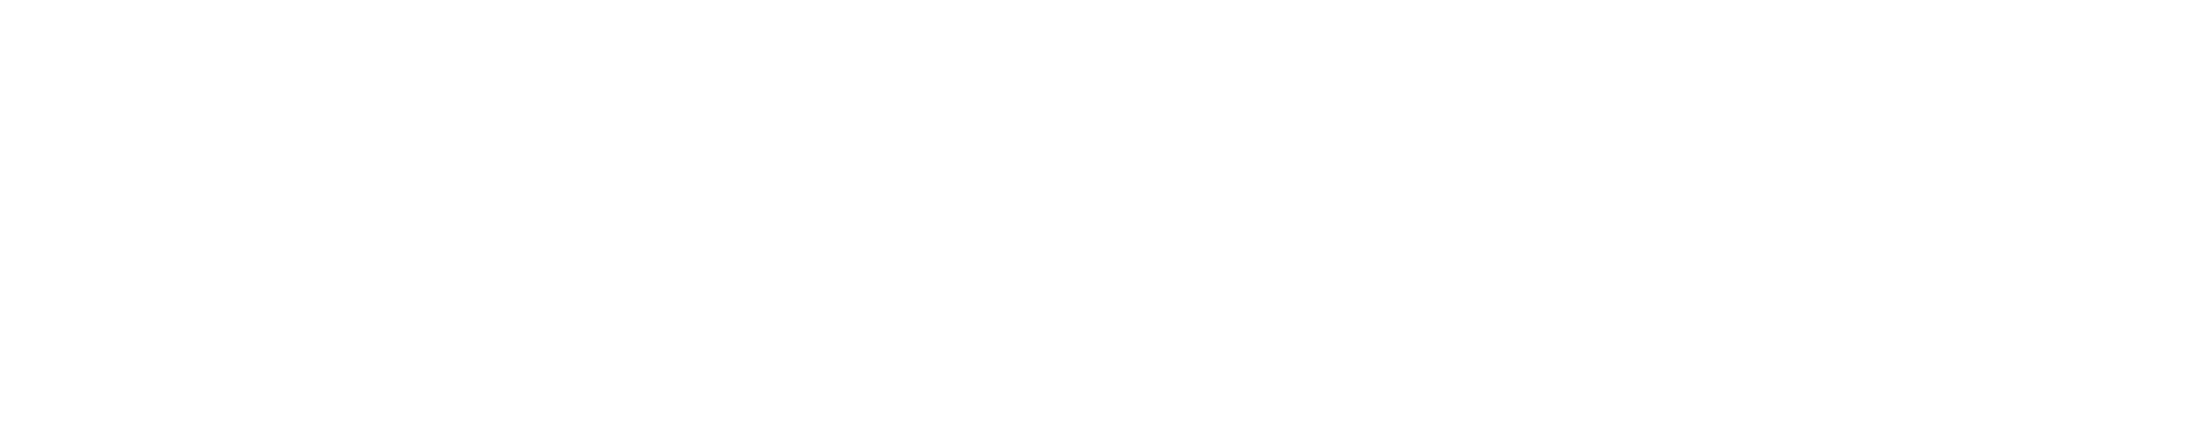

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [15]:
fig, axes = plt.subplots(1, 5, sharex=True,
                         figsize=(20,4))


for ax, sym_pair in zip(axes, [['v', '^'], # triangle up and triangle down
                               ['o', 'x'], # circle and x
                               ['h', '8'], # hexagon and octogon
                               ['s', 'p'], # square and pentagon
                               ['*', 'd']  # diamond and star
                              ]):
    for class_num, (this_class, m,  mec) in enumerate(zip([class0[0][::4], class1[0][::4]],
                                                             sym_pair, 
                                                             ['0.25', 'k'])):
        basic_scatter(ax, X[this_class], 
                      m=m, mfc='None', mec=mec, ms=7,
                      label='class {}'.format(class_num))
    ax.legend()
fig.tight_layout()

*Write your responses here*

## Problem 4) Axes & Grids

By default `matplotlib` has ticks pointing "out" and only located on the left and bottom axes (see any plot above to confirm). 

**Problem 4a** 

Remake the basic plot (**1d**) with the ticks pointing "in" from the axes.

<IPython.core.display.Javascript object>


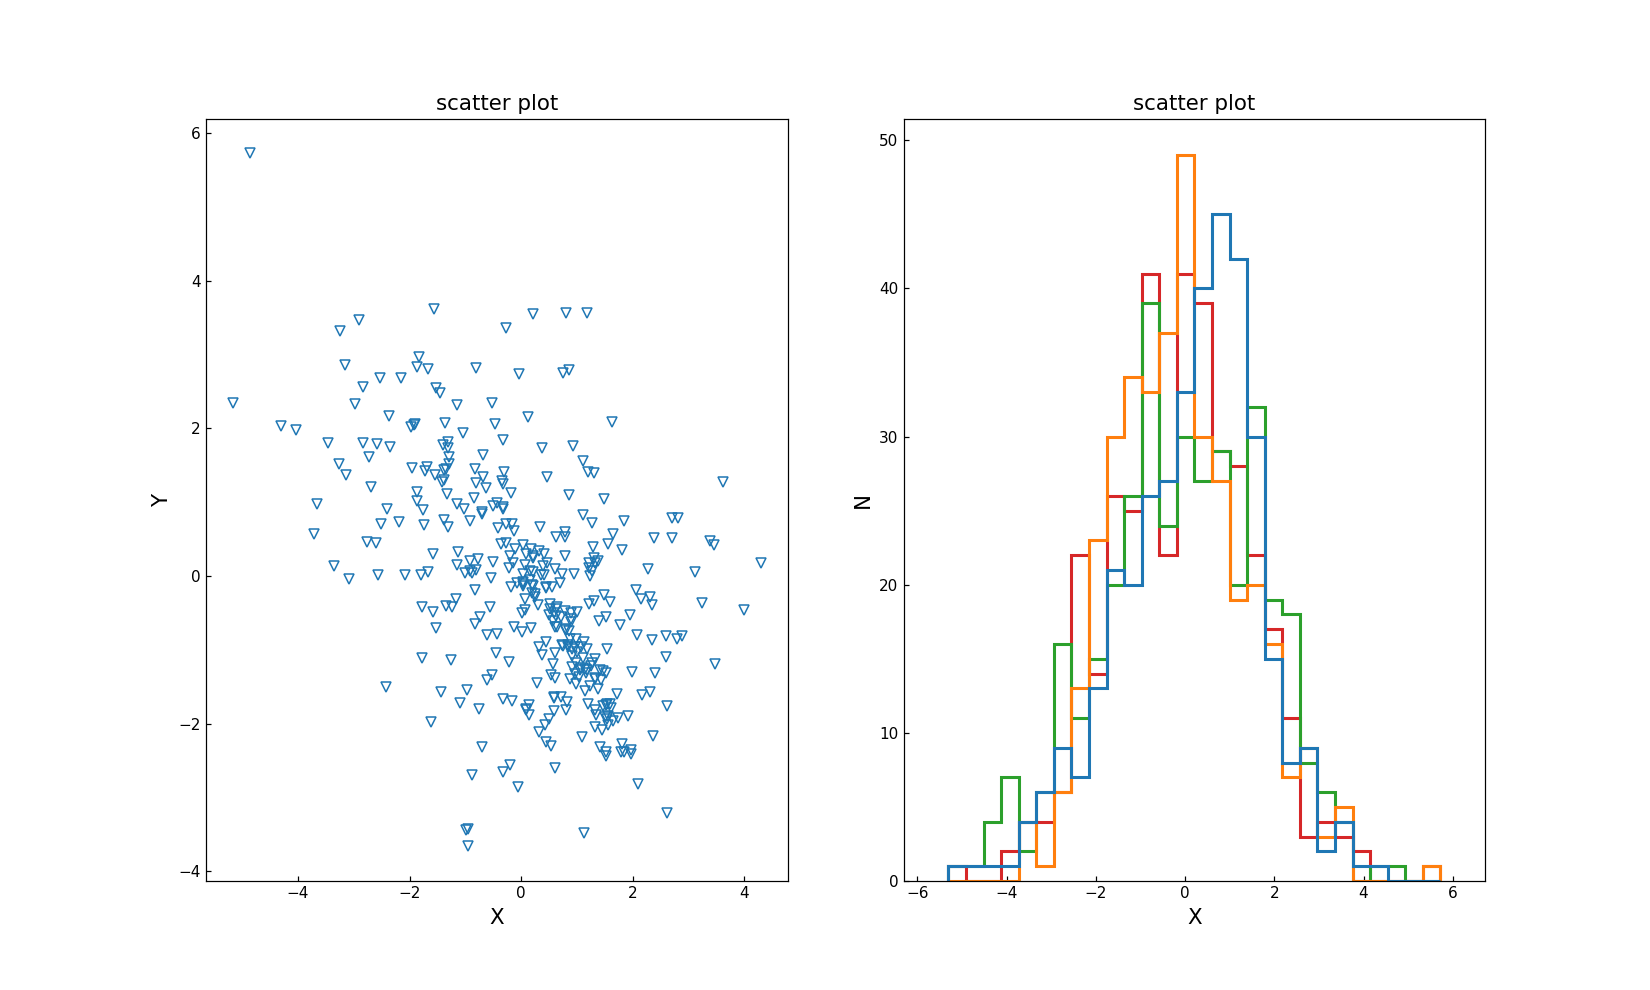

In [24]:
fig, axes=plt.subplots(1,2,figsize=(15,9))# complete
basic_scatter(axes[0],X,m=m,plotconfig={'marker':'None'})# complete
axes[0].tick_params(axis='both',direction='in')# complet
basic_histogram(axes[1],X)# complete
axes[1].tick_params(axis='both',direction='in')# complet

From the histogram we quickly see the problem with ticks that point "in" – they can be obscured by the data. Furthermore, while it is not the case here ticks that go "in" can be confused with data. For these reasons, ticks that point out are almost always superior. 

What about the top and right axes? I often prefer these ticks because they make it easier to estimate data values far from the lower-left corner of the figure, but ticks all around can give a porcupine appearance, and lead to confusing grid plot layouts (see e.g., **3e**).

Sometimes a better solution, though one that is rarely employed in journal publications, is grid lines. Grid lines eliminate the need to carefully trace ticklines to estimate data values. 

**Problem 4b**

Remake the basic plot (**1d**) with gridlines. 

*Hint - See [`pyplot.grid()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html) for documentation.*

In [27]:
plt.grid?

<IPython.core.display.Javascript object>


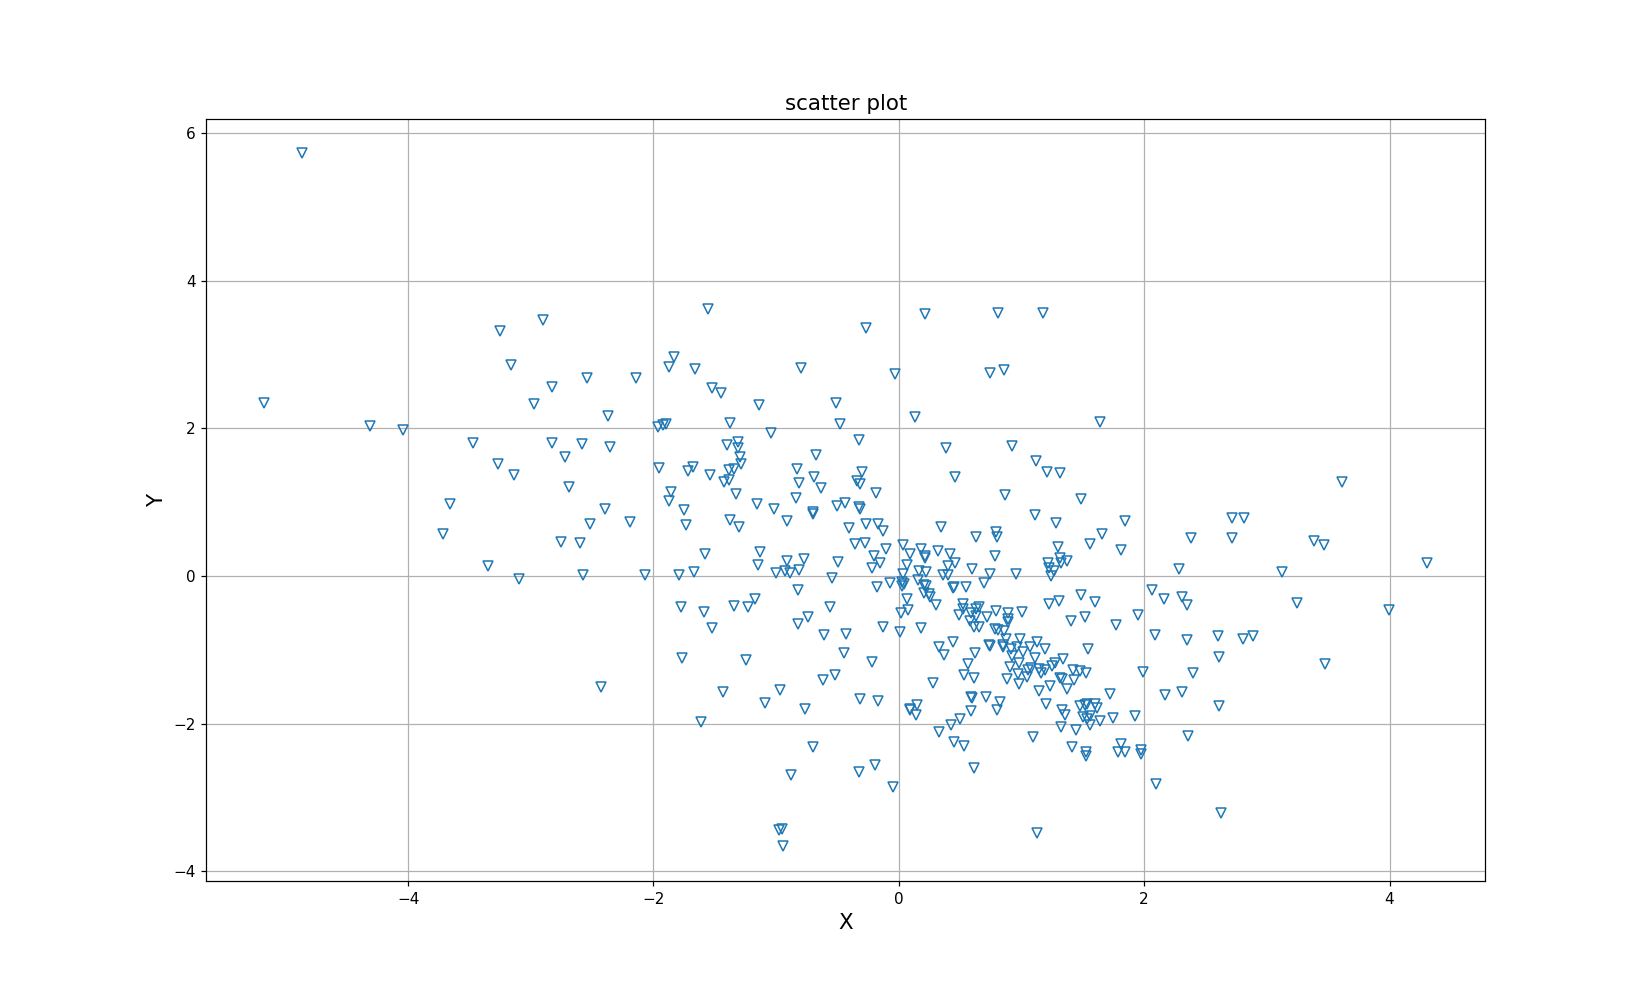

In [26]:
fig, axes=plt.subplots(1,figsize=(15,9))# complete
basic_scatter(axes,X,m=m,plotconfig={'marker':'None'})# complete
axes.grid(True)# complete
# complete
# complete

On the whole, the default application of grid lines detracts from the basic figure. In the plots above the "ink to information" ratio of the grid lines is low. The grid in this case is too dense relative to the data that is being displayed. The grid does, however, make it easier to estimate the coordinates of individual points, or the peak and FWHM of the histogram. 

Grids are extremely useful when making quick quantitative comparisons. 

**Problem 4c** 

Execute the cell below to see the histogram of all 4 features in the data set. Make a quick, but precise, estimate of the peak value of each histogram.

Is this easier with or without the grid lines?

<IPython.core.display.Javascript object>


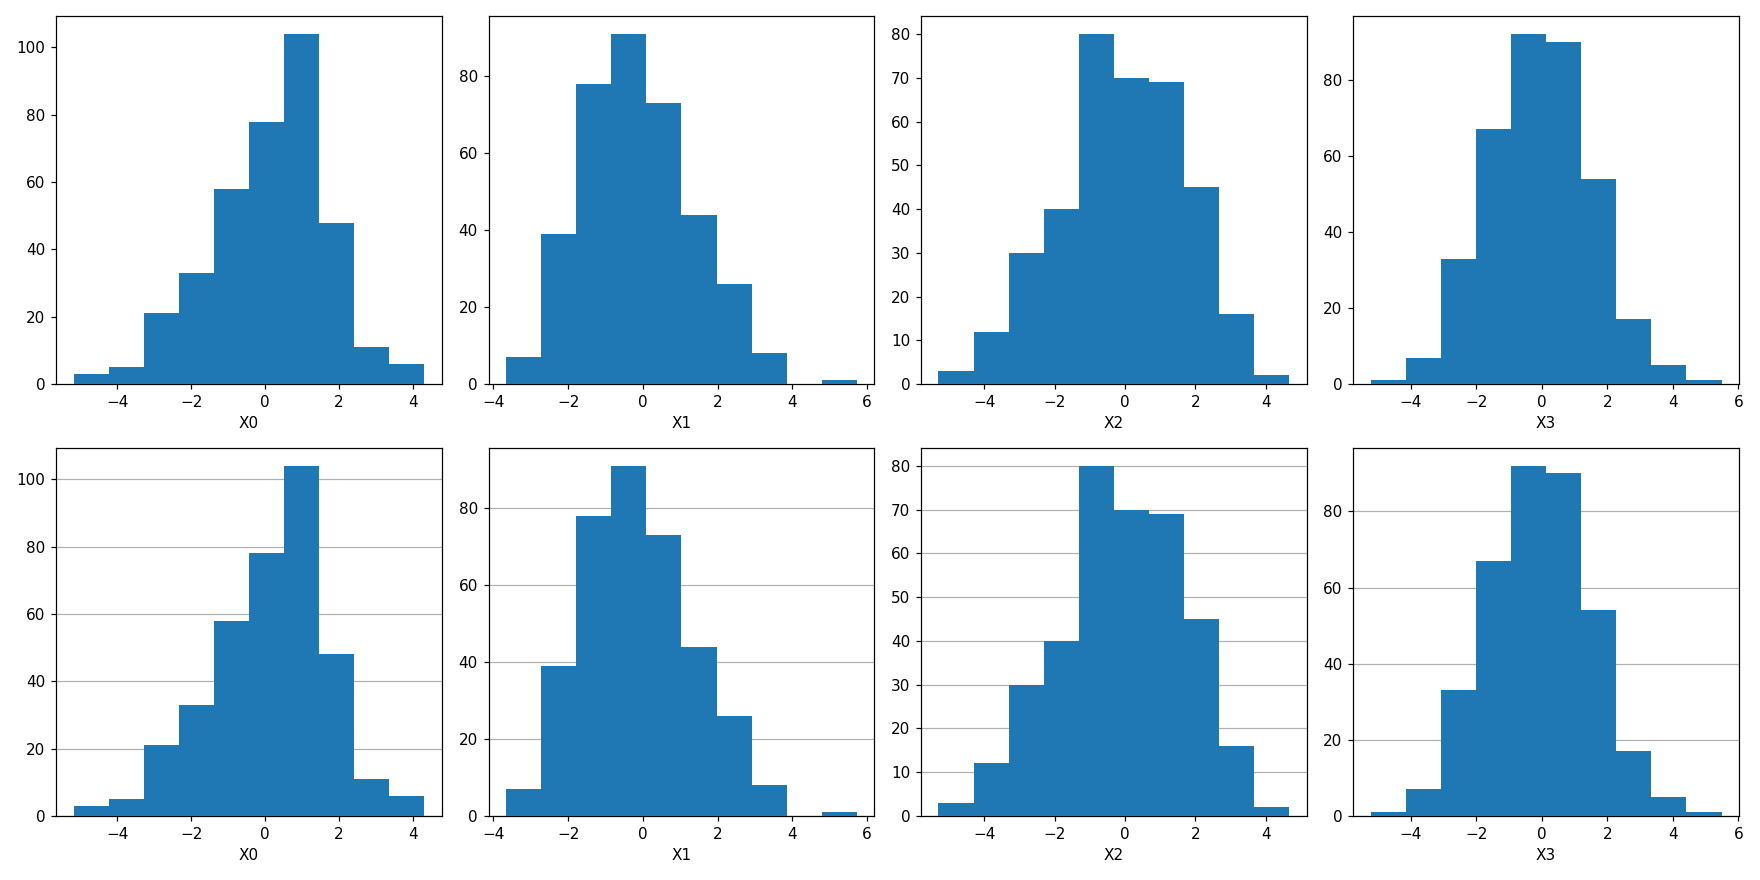

In [17]:
fig, axes = plt.subplots(2, 4, sharex=False,
                         figsize=(16,8))

for ax_num, ax in enumerate(axes.flatten()):
    ax.hist(X[:,ax_num % 4], zorder=10)
    ax.set_xlabel('X{}'.format(ax_num % 4))
    if ax_num > 3:
        ax.grid(axis='y')

fig.tight_layout()

In some applications grid lines are useful to support rapid inference or comparisons. 

Grid lines can also look like data. A visualization with 4 axes, grids, and other lines can quickly become confusing...

Speaking of axes, they are probably the least considered default in `matplotlib`. They are, however, like everything else in your visualizations, customizable. 

**Problem 4d**

Remake the basic plot (**1d**) and remove the top and right axes. 

Has the visualization significantly changed?

*Hint – [`pyplot.spines()`](https://matplotlib.org/api/spines_api.html) makes it easy to turn axes on or off.*

In [30]:
plt.spines?

Object `plt.spines` not found.


<IPython.core.display.Javascript object>


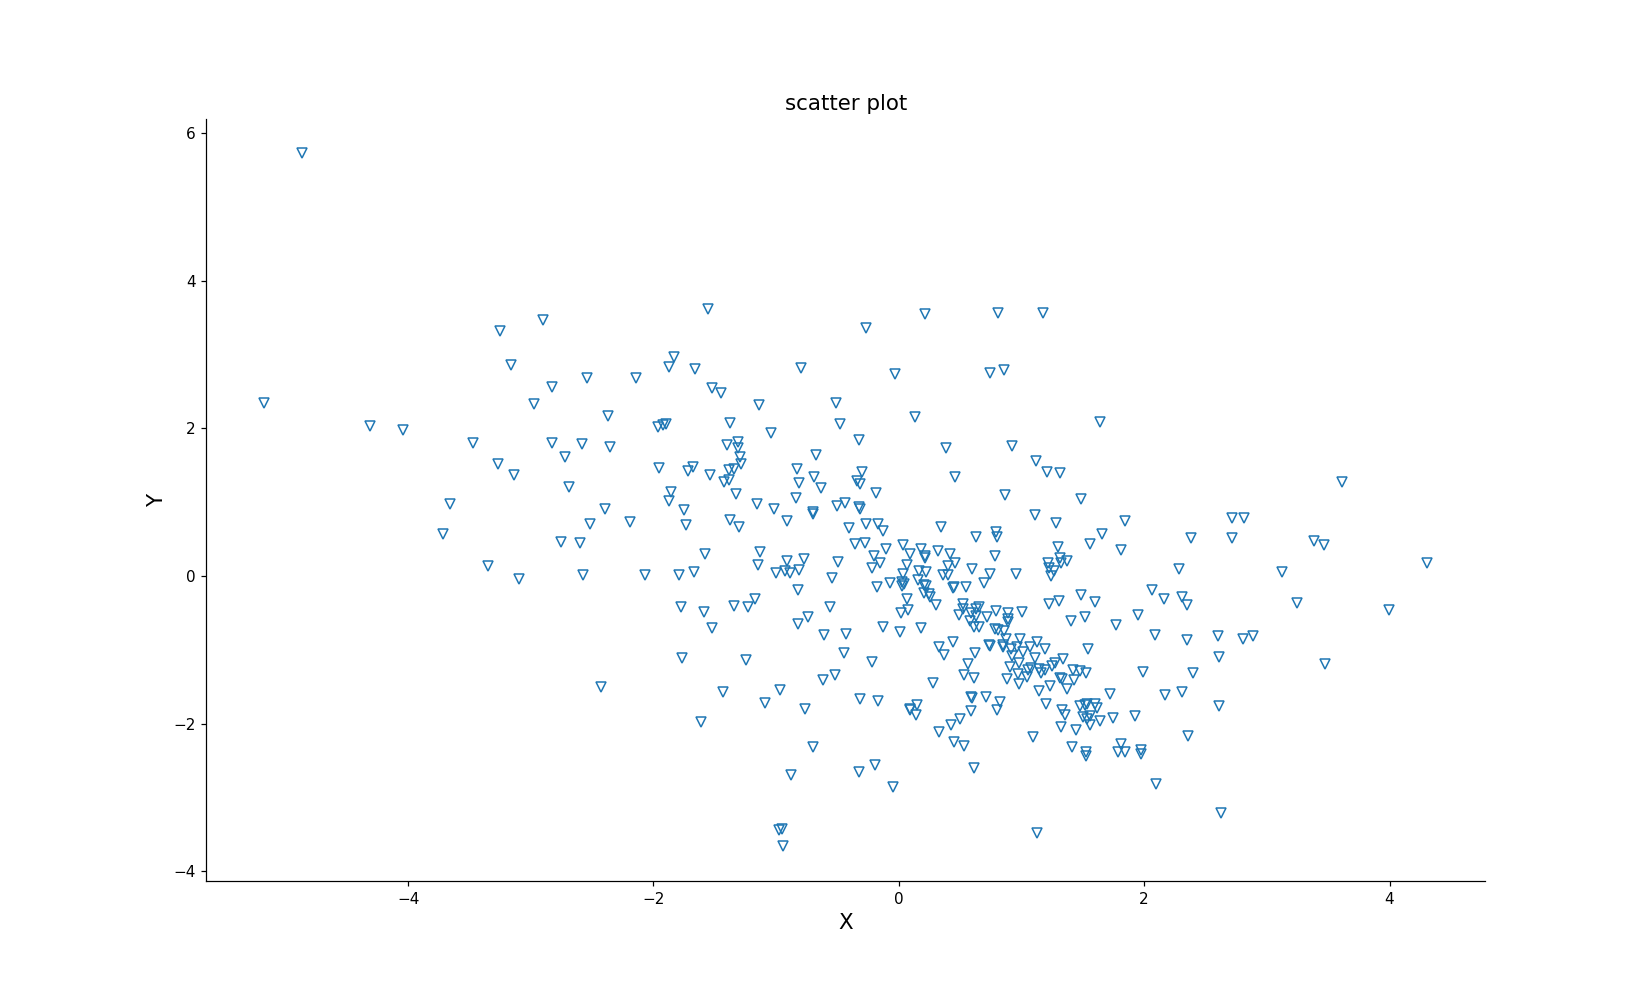

In [36]:
fig, axes=plt.subplots(1,figsize=(15,9))# complete
basic_scatter(axes,X,m=m,plotconfig={'marker':'None'})# complete
for tr in ['top', 'right']:
    axes.spines[tr].set_visible(False)# complete
#xes.spines['right'].set_visible(False)# complete

**Problem 4e**

Remake the basic plot (**1d**) while showing each axis in "bold" (i.e., adjust the linewidth = 3). 

Has the visualization changed significantly?

<IPython.core.display.Javascript object>


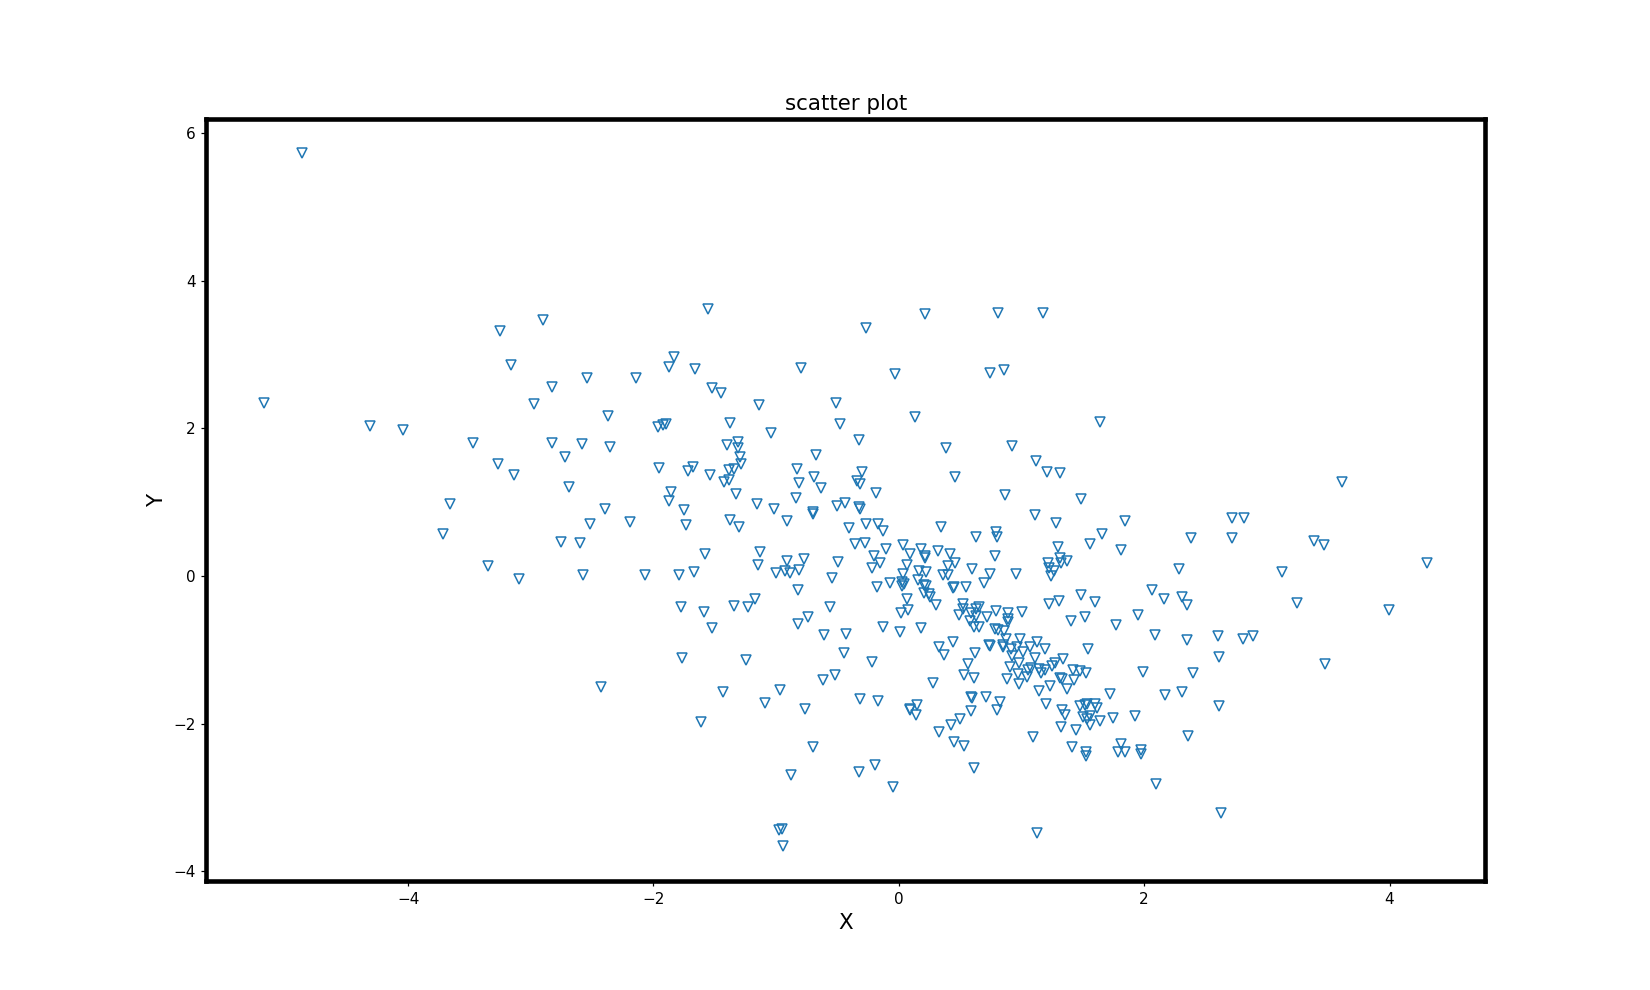

In [37]:
fig, axes=plt.subplots(1,figsize=(15,9))# complete
basic_scatter(axes,X,m=m,plotconfig={'marker':'None'})# complete
for tr in ['top', 'right','left', 'bottom']:
    axes.spines[tr].set_linewidth(3)# complete
# complete

In the vast majority of cases the default axes parameters should be fine. Removing the top and right axis encourages the eye to wander out towards infinity (though in a paper the placement of text will prevent that). The bold axes draw attention away from the data, which is rarely what you want the viewer to focus on (one possible exception – on slides a bold axis can draw attention towards the figure should there be competing text or titles that the audience might otherwise look at). 

## Problem 5) Color

There are two important default colors to know about in `matplotlib`: the default colormap is [viridis](https://matplotlib.org/users/dflt_style_changes.html#colormap) and the default color sequence is the [10 color palette](https://matplotlib.org/users/dflt_style_changes.html#colors-in-default-property-cycle) developed by [Tableau](https://www.tableau.com/). 

In short, `viridis` is much better than the previous default (the dreaded `jet`/rainbow colormap). The Tableau palette was designed to be colorblind friendly when displaying categorical data (it isn't perfect, but it is better than picking random "well-known" colors – green, blue, red, yellow, etc). 

**Problem 5a**

Download [this](https://northwestern.box.com/s/czpn081xb6wq9xq3hlz0xg9k87matpbw) (incredibly small) image data file, im.npy.$^\dagger$ Load the data into a variable `im`, and use [`pyplot.imshow()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) to display the image data.

What is this an image of?

$^\dagger$ The appendix at the end of this notebook shows how the file was created. Please don't skip ahead to learn the answer.

<IPython.core.display.Javascript object>


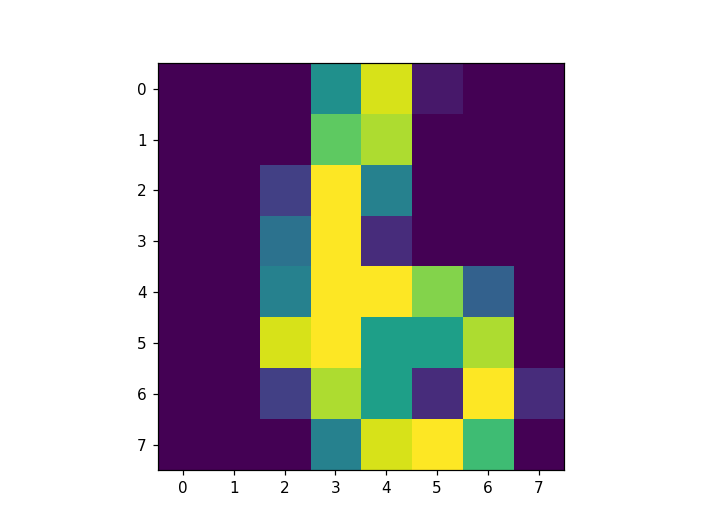

In [38]:
im = np.load('im.npy')

plt.imshow(im)# complete
# complete
# complete

I contend that you are familiar with the content of the above image. I also contend that, in this case, the use of `viridis` obscures what is being shown in the image.

**Problem 5b**

Remake the above plot using the `binary` colormap. Do you recognize the image now?

<IPython.core.display.Javascript object>


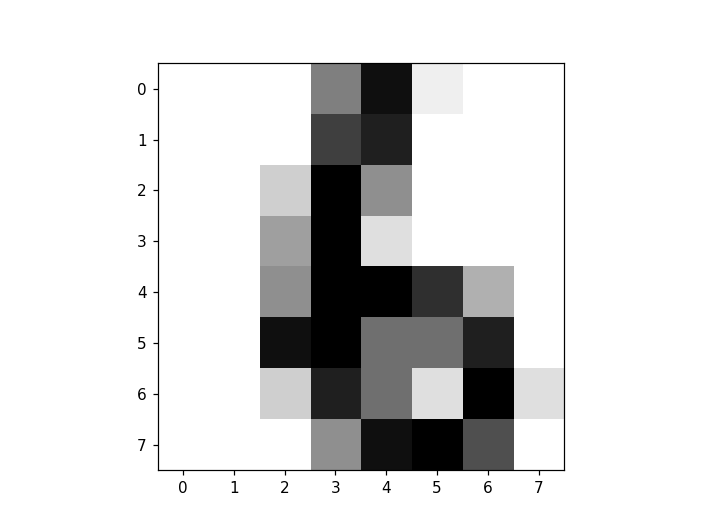

In [39]:
plt.imshow(im,cmap='binary')# complete
# complete
# complete

The image shows a pixelated scan of a handwritten "6" - which is more clear in greyscale than `viridis`. 

Color can be very powerful when building visualizations, but it is often unnecessary, and in some cases worse than a simple greyscale. If you must use color – make specific choices that improve what is being communicated by the final product.

## Problem 6) Defaults

The developers of `matplotlib` are all much smarter than I. Their choices for default parameters work really well. But in papers, talks, posters and other presentations your aim should be to highlight and communicate very specific ideas. To do so you cannot rely solely on the defaults.  

Avoiding defaults can also be daunting, the previous 5 problems only begin to scratch the surface of what is possible.  Fortunately, it is possible to "pre-load" different styles than the "standard" `matplotlib` default using `matplotlib` [style sheets](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html).

**Problem 6a** 

Remake the basic multiclass plot (**3a**) using the `classic` (i.e., v1.0) matplotlib style.

Do you see improvements relative to what we made previously?

*Hint - set the plot style using `plt.style.context("classic")`*

<IPython.core.display.Javascript object>


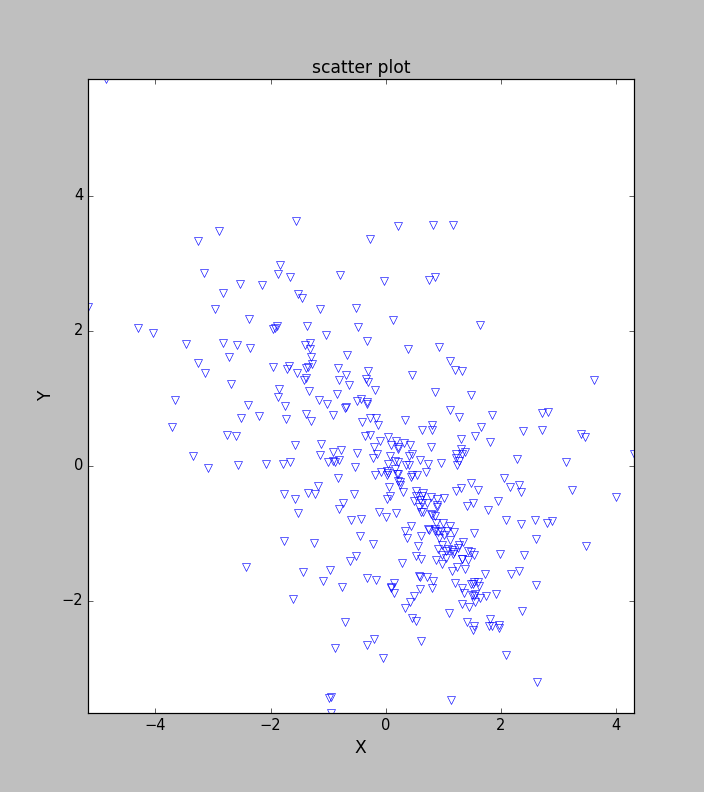

In [40]:
with plt.style.context("classic"):
    fig, axes=plt.subplots(1,figsize=(8,9))
    basic_scatter(axes,X,m=m,plotconfig={'marker':'None'})# complete
    # complete
    # complete

[My eyes!](https://media.giphy.com/media/l2Je7GLhkevHc5I9G/giphy.gif) This style replicates many of the problems we discussed previously, while also adding new ones. 

**Problem 6b** 

Remake the basic multiclass plot using the `grayscale` matplotlib style.

Do you see improvements relative to what we made previously?

<IPython.core.display.Javascript object>


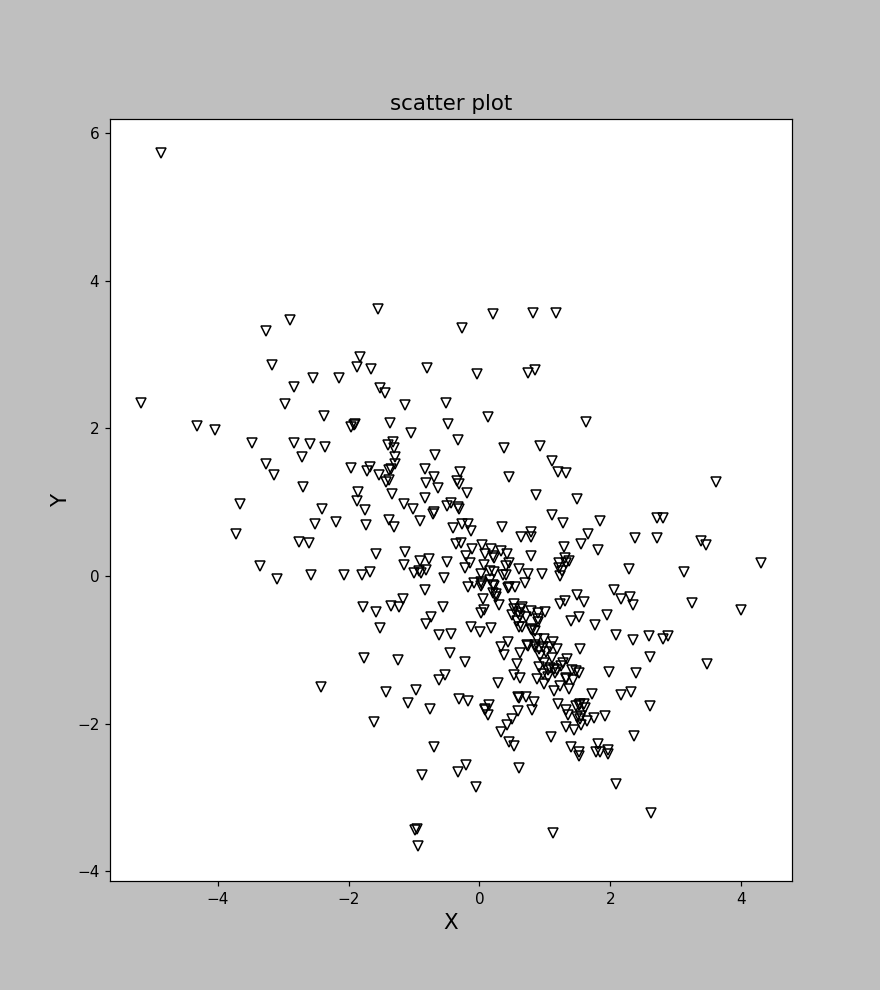

In [41]:
with plt.style.context("grayscale"):
    fig, axes=plt.subplots(1,figsize=(8,9))
    basic_scatter(axes,X,m=m,plotconfig={'marker':'None'})# complete
    # complete
    # complete# complete
# complete
# complete

**Problem 6c** 

Remake the basic multiclass plot using the `seaborn` matplotlib style.

Do you see improvements relative to what we made previously?

<IPython.core.display.Javascript object>


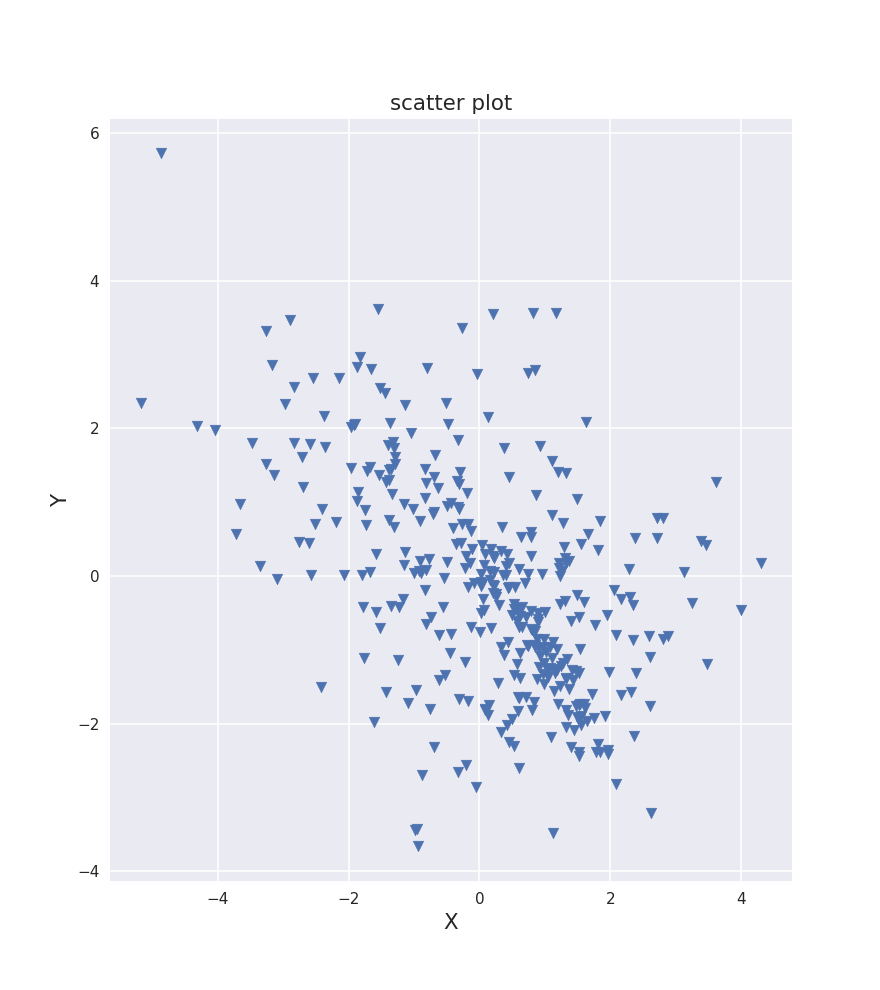

In [49]:
with plt.style.context("seaborn"):
    fig, axes=plt.subplots(1,figsize=(8,9))
    basic_scatter(axes,X,m=m,plotconfig={'marker':'None'})# complete
    # complete

**Problem 6d** 

Remake the basic multiclass plot using the `fivethirtyeight` matplotlib style.

Do you see improvements relative to what we made previously?


<IPython.core.display.Javascript object>


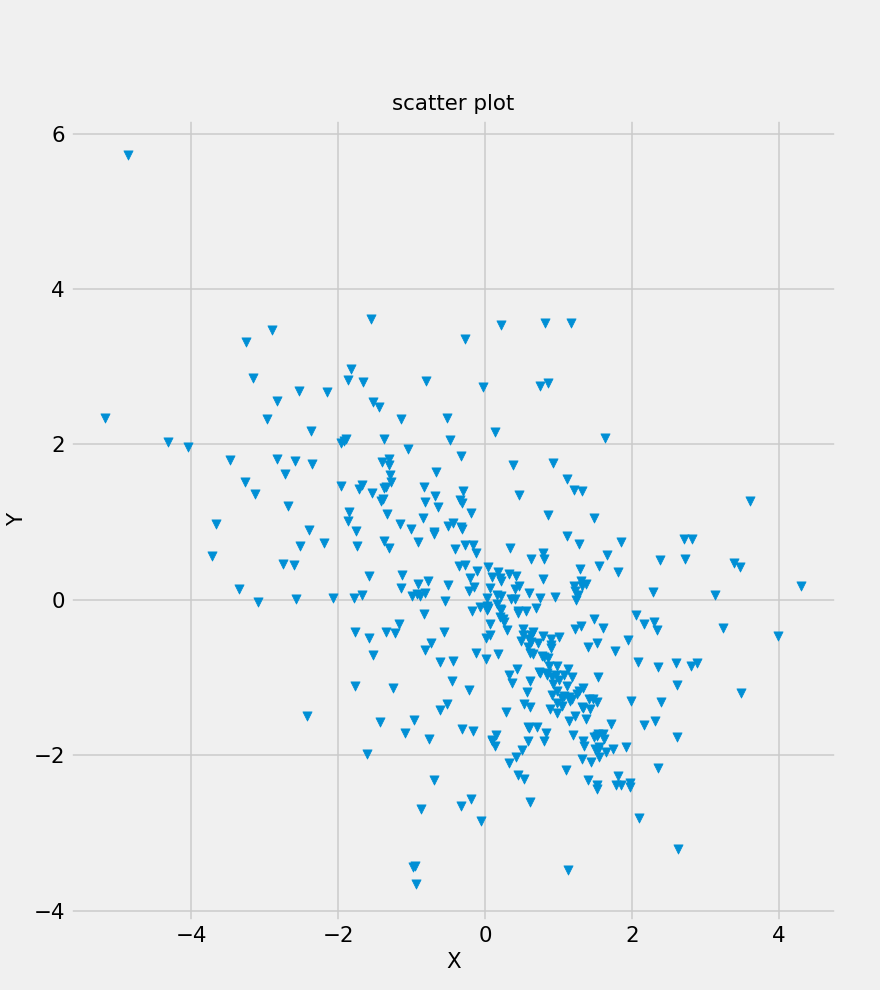

In [50]:
with plt.style.context("fivethirtyeight"):
    fig, axes=plt.subplots(1,figsize=(8,9))
    basic_scatter(axes,X,m=m,plotconfig={'marker':'None'})# complete
    # complete
    # complete# complete
# complete
# complete

**Problem 6e** 

Remake the basic multiclass plot using the `dark_background` matplotlib style.

Do you see improvements relative to what we made previously?

<IPython.core.display.Javascript object>


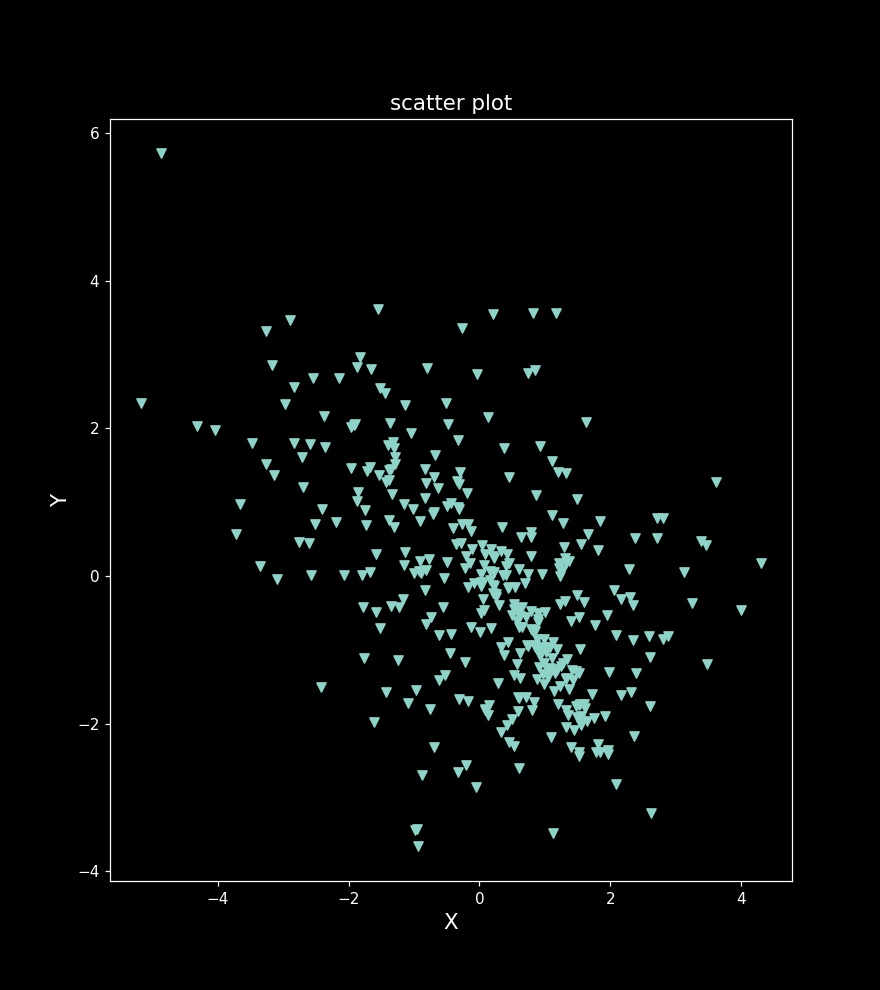

In [51]:
with plt.style.context("dark_background"):
    fig, axes=plt.subplots(1,figsize=(8,9))
    basic_scatter(axes,X,m=m,plotconfig={'marker':'None'})# complete
   # complete
# complete
# complete

In total there are 27 different style sheets, and they provide a wide range of initial plotting possibilities. Options include changes in the background colors (dark backgrounds, which are typically avoided because they look bad in papers, can often look really nice on projected slides), grids (`seaborn` and `fivethirtyeight` both provide grids that are not too intrusive, and colormaps and color cycles that vary significantly. 

## Problem 7) Salience

The lecture and this notebook are supposed to be about building salience, and yet we have spent the last 6 problems only talking about default settings in `matplotlib` – what's your deal Adam?

**Problem 7a**

Build a visualization showing all three classes created in problem 1. Class 2 should be the "salient feature" for this visualization. Thinking about the defaults, discussed to an annoying degree above, and things like visual boundaries, highlight the importance of class 2.

*Hint - this is intentionally open ended. You will need to explore a bit before arriving at your final answer.* 

In [ ]:
y

<IPython.core.display.Javascript object>


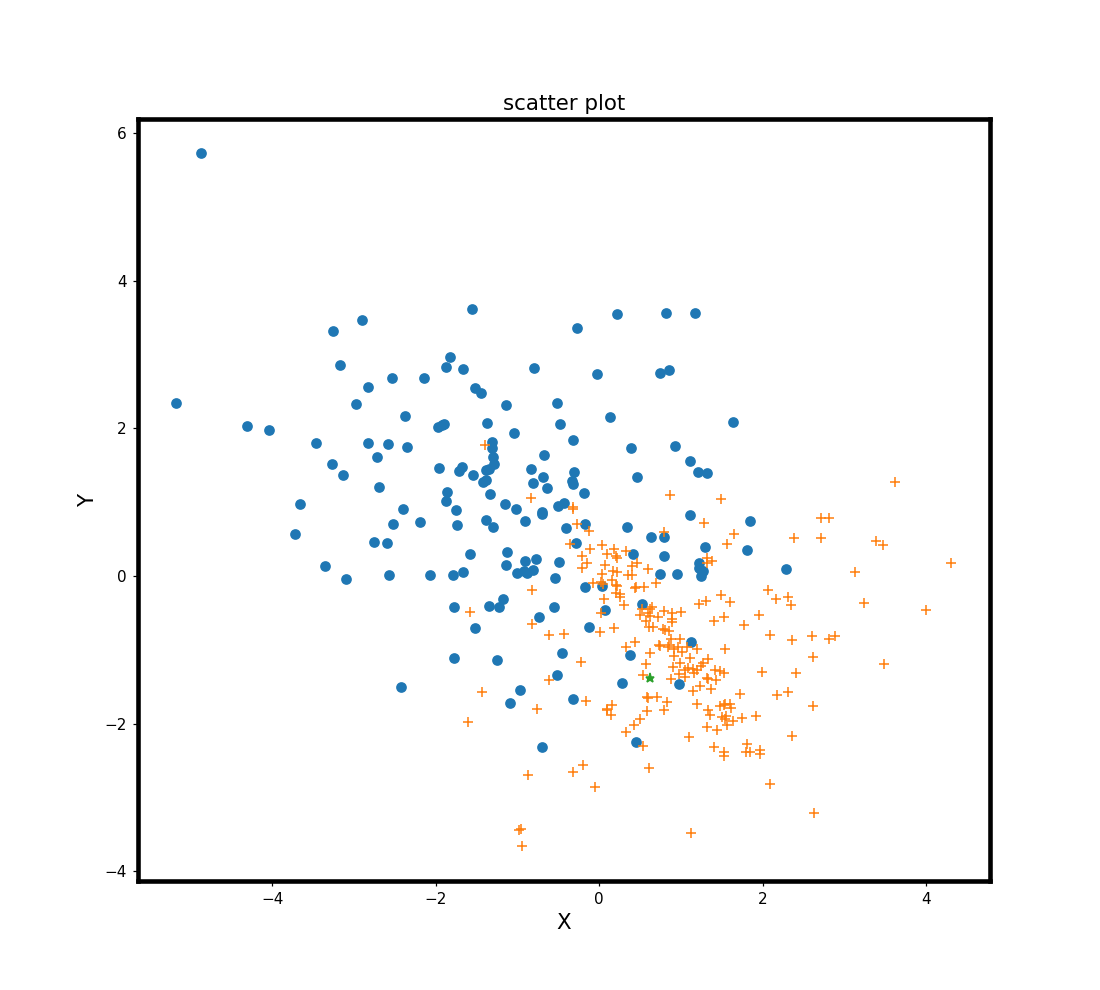

In [60]:
fig,axes = plt.subplots(1, figsize=(10,9))# complete

class0 = X[y==0]
class1 = X[y==1]
class2 = X[y==2]
marker_c0 = '+'
marker_c1 = 'o'
marker_c2 = '*'
basic_scatter(axes,class1, marker_c1, plotconfig={'marker':None})# complete
basic_scatter(axes,class0, marker_c0, plotconfig={'marker':'None'})
basic_scatter(axes,class2, marker_c2, plotconfig={'marker':None})
for tr in ['top','right', 'left','bottom']:
    axes.spines[tr].set_linewidth(3)

# complete

# complete
# complete
# complete

## Appendix

The cells below show the process used to select the data for **Problem 5**

In [52]:
from sklearn.datasets import load_digits

mnist = load_digits()
np.save('im.npy', mnist.images[16])